# Praktikum Ensemble Learning

Anggota Kelompok

Alif As'ad Ramadhan (5054231007)

Dhafin Kurniawan (5054231016)

#### Prepare Tools

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline

## 1. Prepare Dataset

Tentang Dataset

1. preg: Jumlah kehamilan.

2. plas: Kadar glukosa plasma setelah 2 jam tes toleransi glukosa oral.

3. pres: Tekanan darah diastolik.

4. skin: Ketebalan lipatan kulit triceps (mm).

5. insu: Kadar insulin serum 2 jam (µU/mL).

6. mass: Indeks massa tubuh (BMI).

7. pedi: Skor riwayat keluarga diabetes.

8. age: Usia (tahun).

9. class: Diagnosis diabetes: b'tested_positive' (positif), b'tested_negative' (negatif).

In [667]:
df = pd.read_csv('diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


### Clearing Dataset

In [669]:
# cek Missing Values
df.isna().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Tidak ada Missing Values pada Dataset

In [671]:
# cek apakah ada duplikasi data 
df.duplicated().sum()

0

Tidak ada data yang duplikat

In [673]:
# cek Unique value dari masing masing kolom
df.nunique()

preg      17
plas     136
pres      47
skin      51
insu     186
mass     248
pedi     517
age       52
class      2
dtype: int64

Unique value dari setiap kolom bervariasi (aman)

In [675]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


## 2. EDA

In [677]:
# melihat deskripsi data
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [678]:
avg_age_class = df.groupby('class')['age'].mean().reset_index()
avg_age_class.head()

,class,age
0,b'tested_negative',31.190000
1,b'tested_positive',37.067164


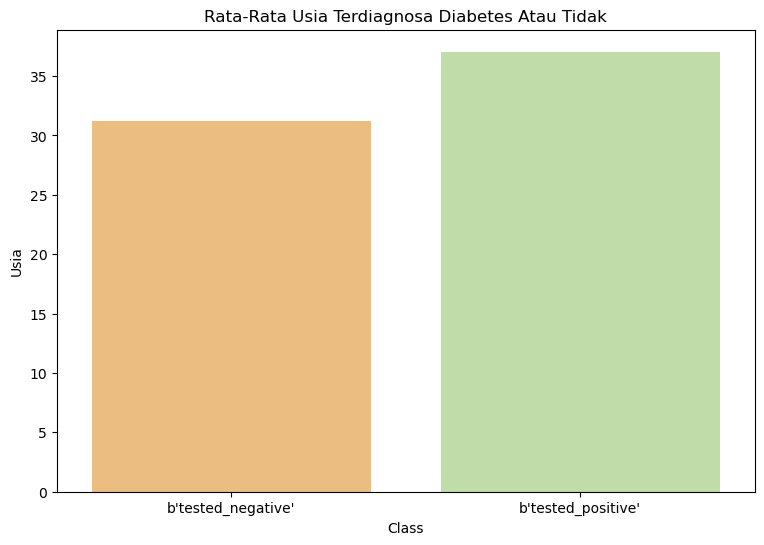

In [679]:
# melihat rata rata usia yang terdiagnosa diabetes atau tidak
plt.figure(figsize=(9,6))
sns.barplot(x='class', y='age', data=avg_age_class, hue='class', palette='Spectral')
plt.title('Rata-Rata Usia Terdiagnosa Diabetes Atau Tidak')
plt.xlabel('Class')
plt.ylabel('Usia')
plt.show()

In [680]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [681]:
mass_age_class = df.groupby('class')['mass'].mean().reset_index()
mass_age_class.head()

,class,mass
0,b'tested_negative',30.304200
1,b'tested_positive',35.142537


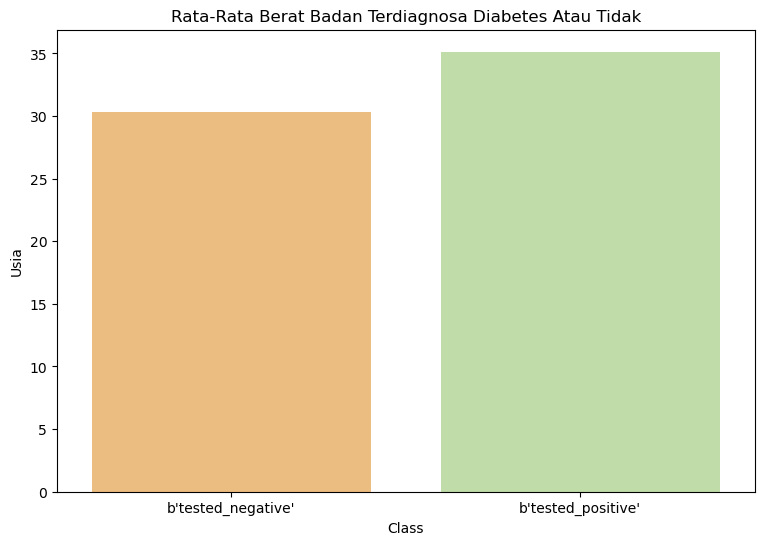

In [682]:
# melihat rata rata berat badab yang terdiagnosa diabetes atau tidak
plt.figure(figsize=(9,6))
sns.barplot(x='class', y='mass', data=mass_age_class, hue='class', palette='Spectral')
plt.title('Rata-Rata Berat Badan Terdiagnosa Diabetes Atau Tidak')
plt.xlabel('Class')
plt.ylabel('Usia')
plt.show()

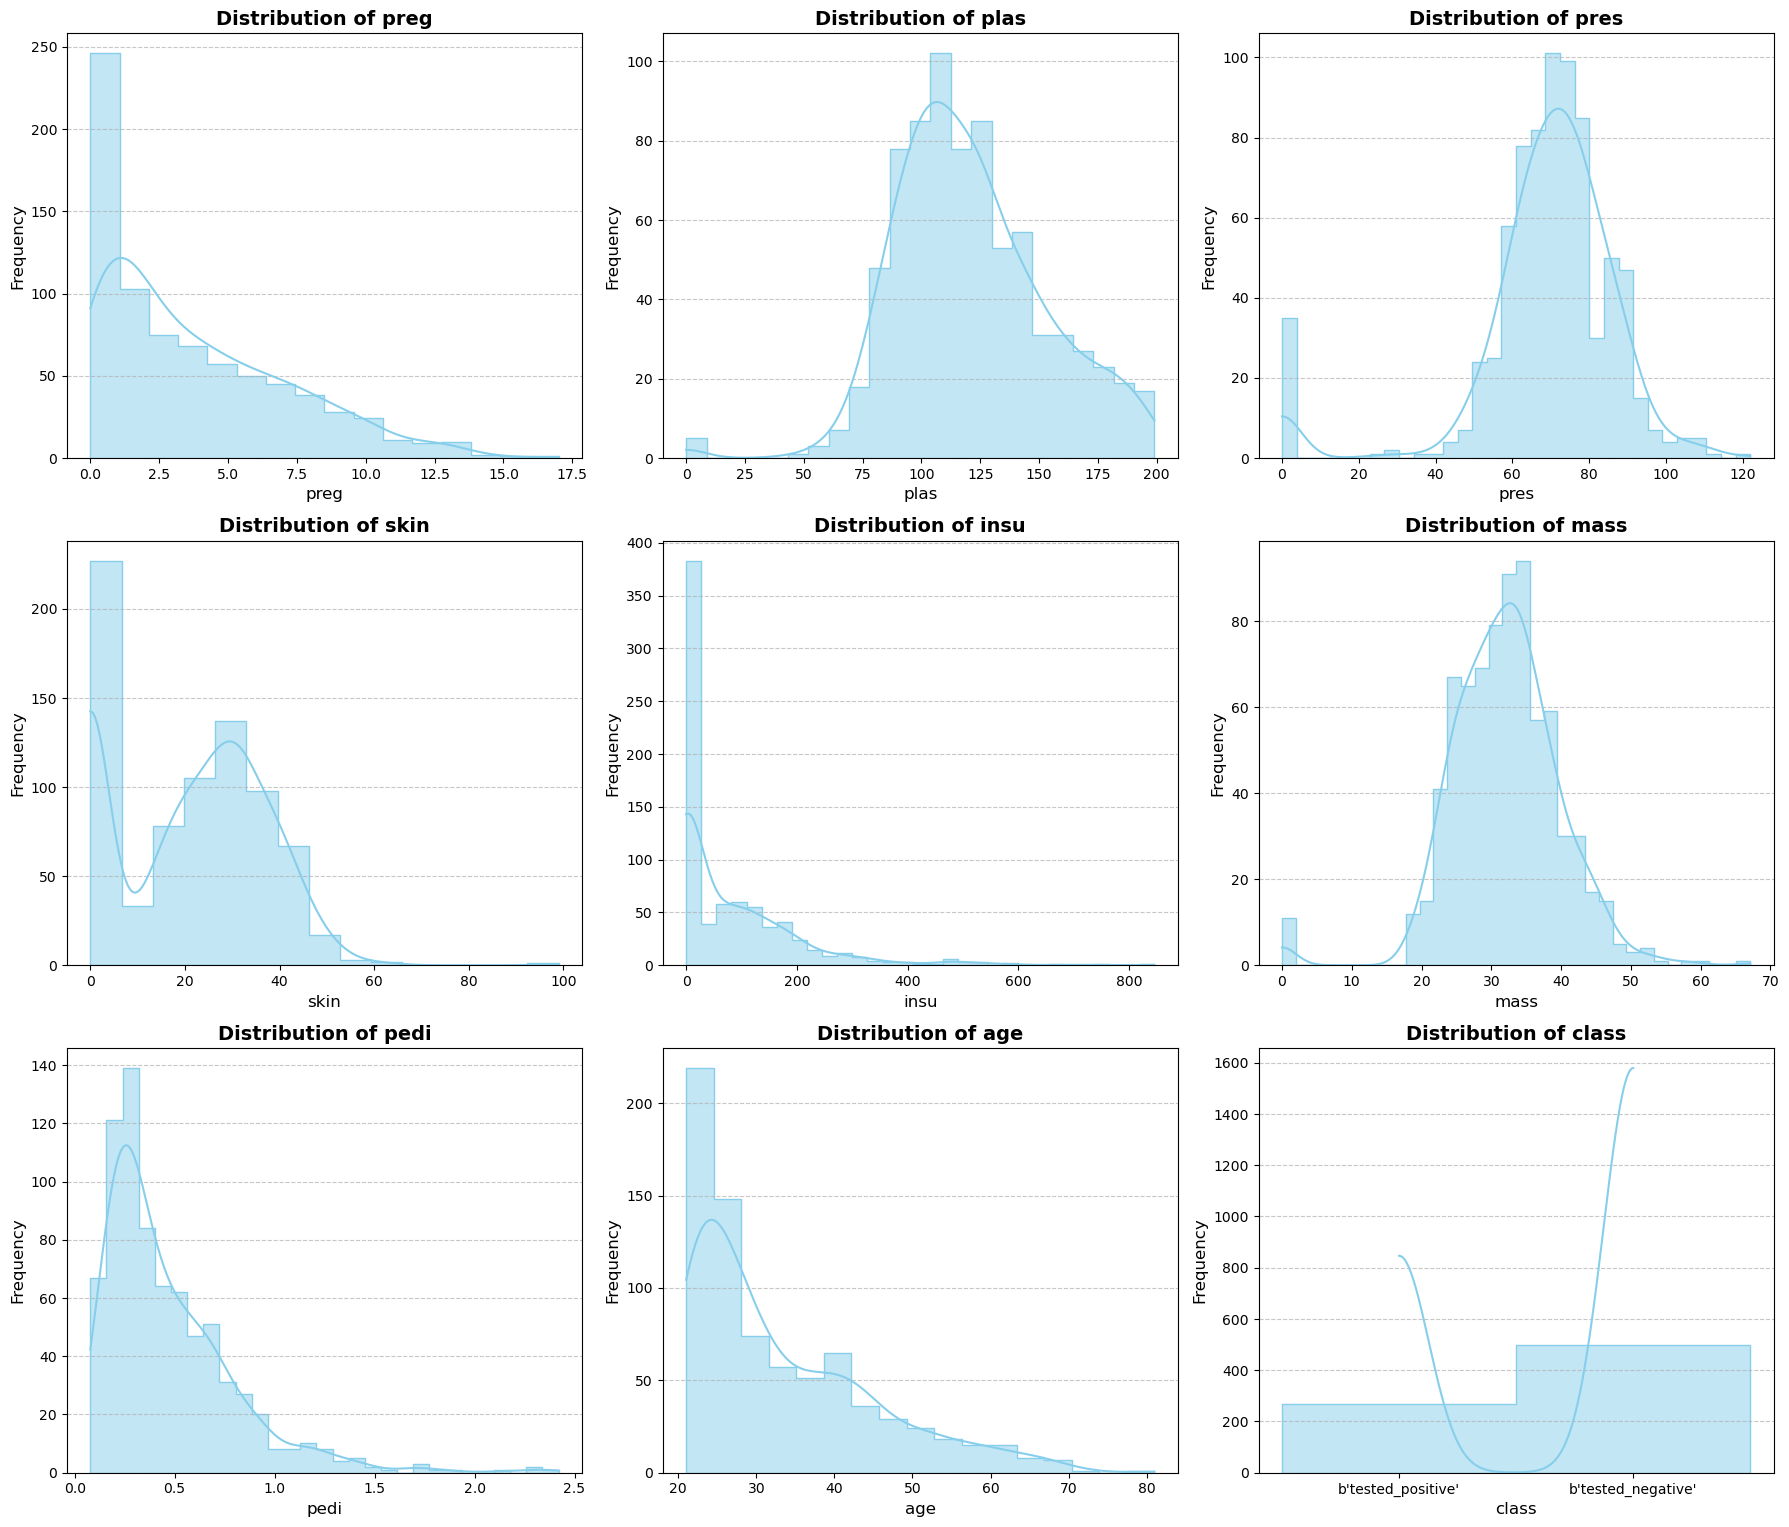

In [683]:
# Melihat distribusi kolom
n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(18, n_rows * 5))

# Membuat visualisasi histogram untuk setiap kolom dalam df
for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=column, kde=True, color='skyblue', element='step')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

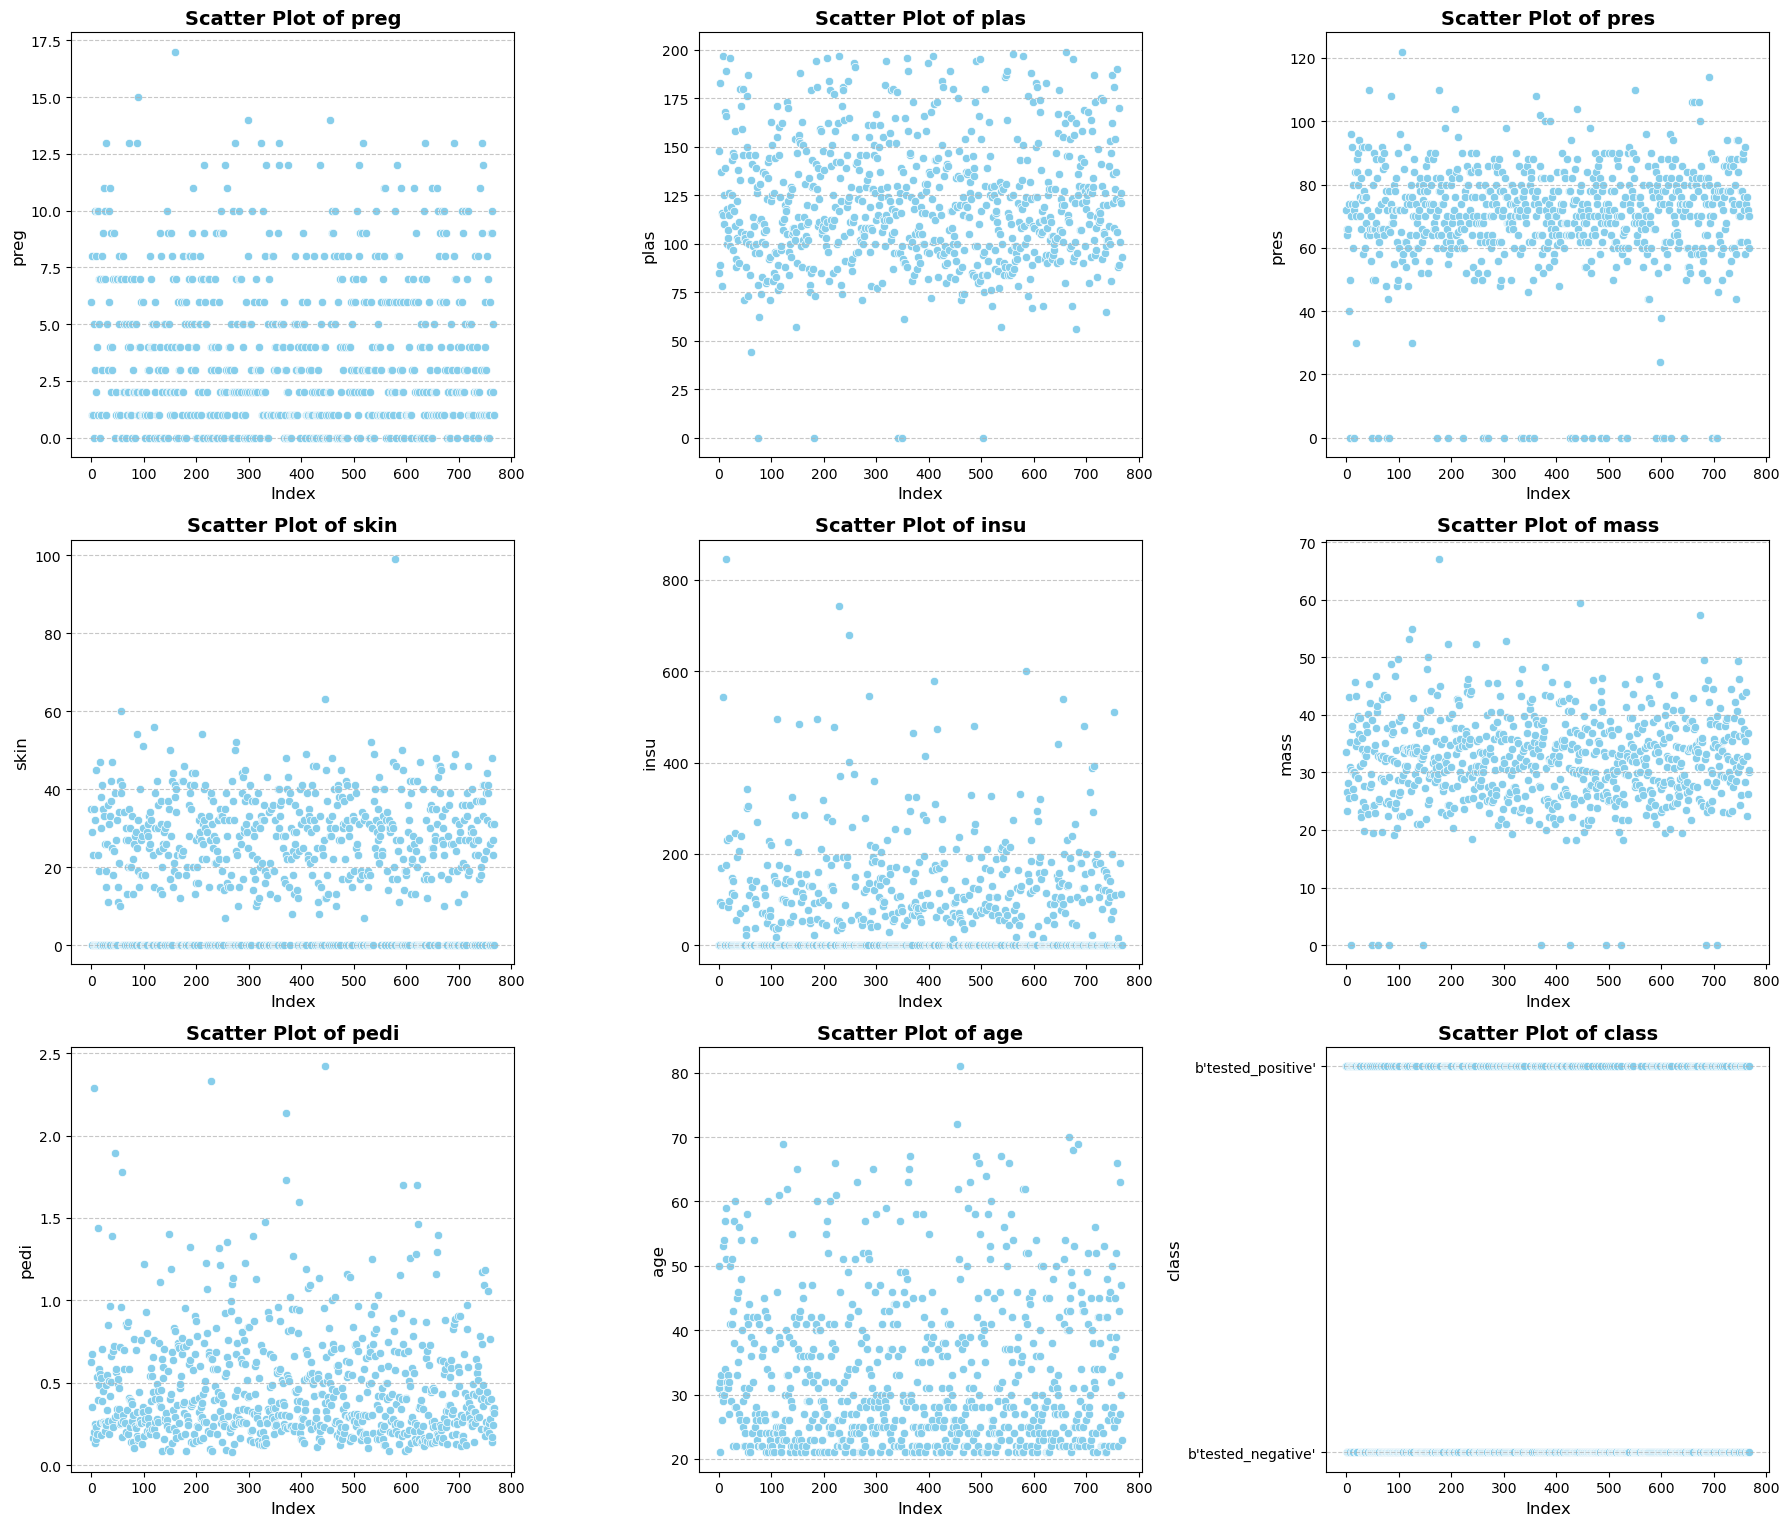

In [684]:
n_cols = 3
n_rows = (len(df.columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=df.index, y=df[column], color='skyblue')
    plt.title(f'Scatter Plot of {column}', fontsize=14, fontweight='bold')
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 3. Preprocessing Data

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


Bisa dilihat bahwa masih ada data yang bertipe `Object` kita konvert menjadi numerik menggunakan `Encoding Manual`

In [688]:
df['class'].value_counts()

class
b'tested_negative'    500
b'tested_positive'    268
Name: count, dtype: int64

In [689]:
# Mapping manual untuk kolom 'class'
mapping_class = {
    "b'tested_negative'": 0,
    "b'tested_positive'": 1
}

# Terapkan mapping ke kolom 'kerusakan'
df['class'] = df['class'].map(mapping_class)

In [690]:
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

#### Membuat Corelation Matrix

(9.5, -0.5)

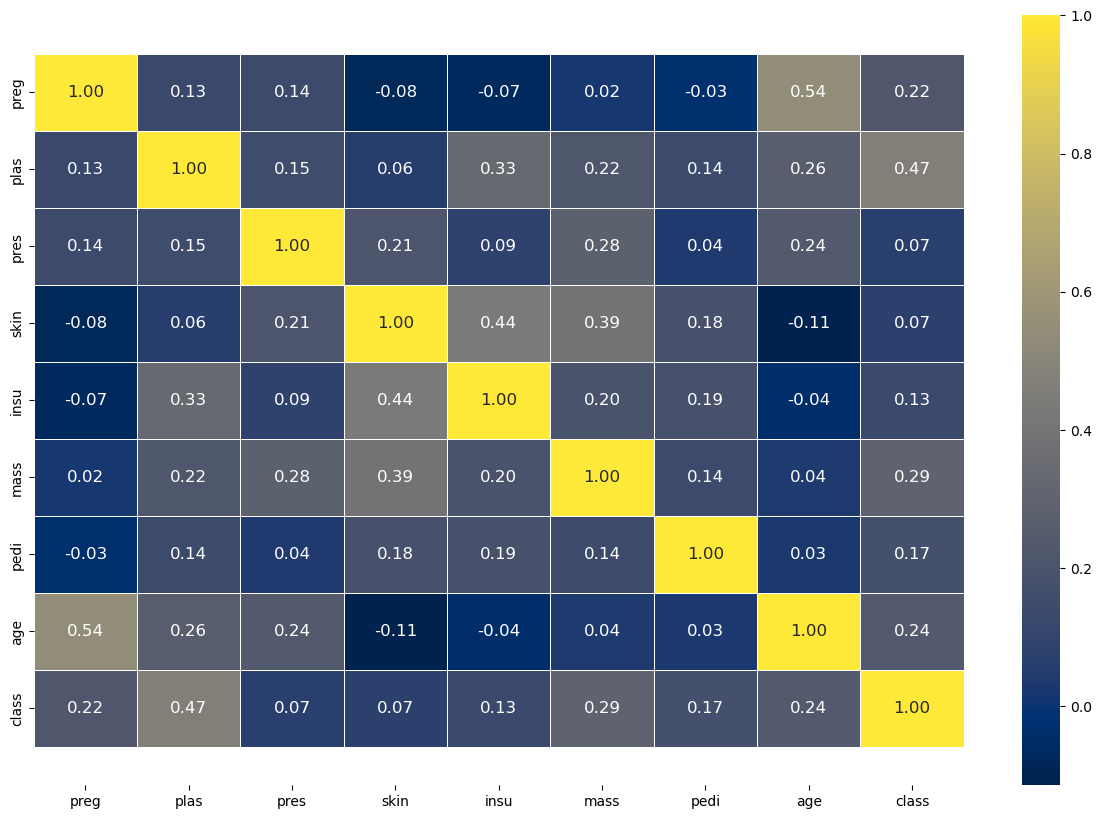

In [692]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="cividis",
                 annot_kws={"size": 12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Cek Outlier 

In [694]:
col = df.columns

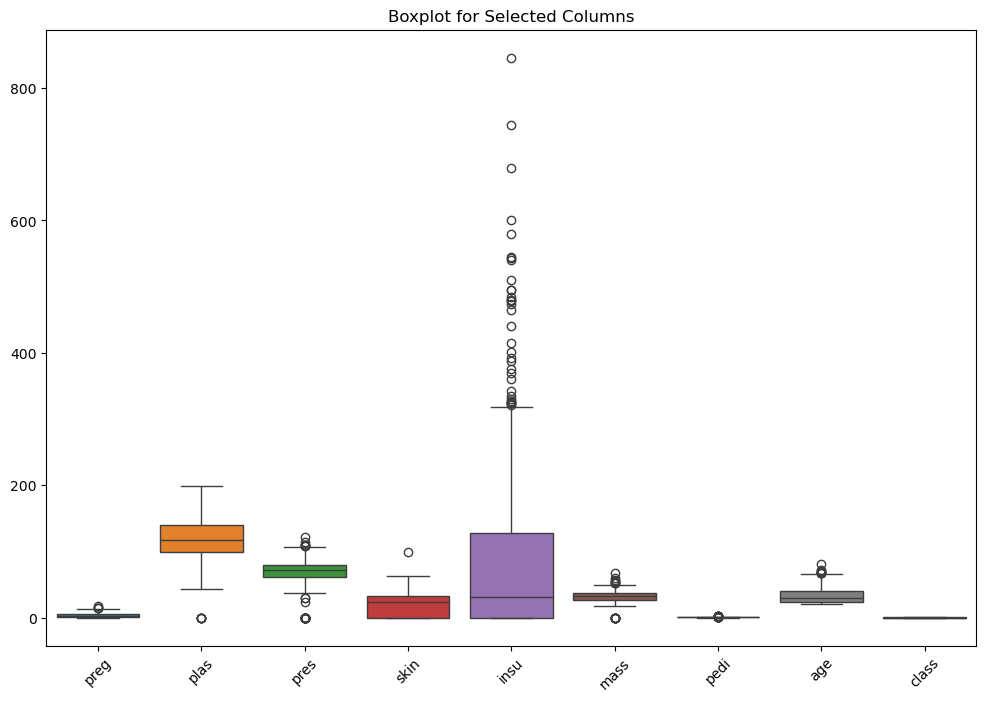

In [695]:
# Filter the dataset to only these columns
boxplot_data = df[col]

# Plotting the boxplot for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data)
plt.xticks(rotation=45)
plt.title('Boxplot for Selected Columns')
plt.show()

#### Melakukan Scaling Data

In [697]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()
train_scaled = scale.fit_transform(df)
data_scaled = pd.DataFrame(data=train_scaled, columns=col)
data_scaled.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


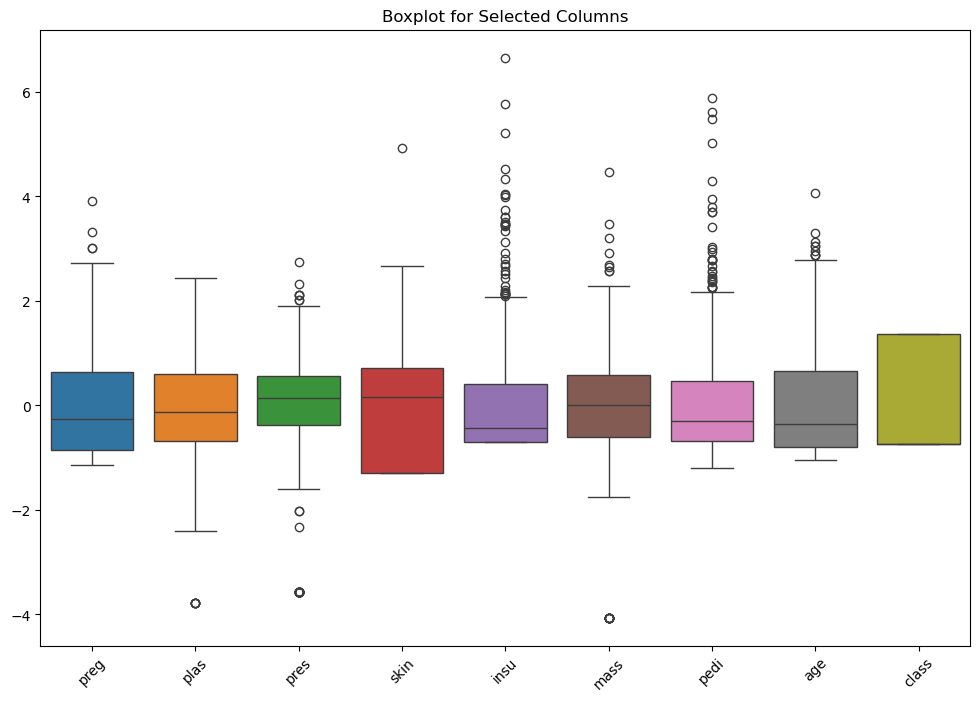

In [698]:
# Filter the dataset to only these columns
boxplot_data = data_scaled[col]

# Plotting the boxplot for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data)
plt.xticks(rotation=45)
plt.title('Boxplot for Selected Columns')
plt.show()

## 5. Modelling

In [700]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Mengabaikan peringatan konvergensi
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Membagi Data Menjadi `data train` dan `data test`

In [702]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)  
y = df['class']                

# Memisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

siapkan model

In [704]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### Coba setiap model tanpa menggunakan ensemble learning

In [706]:
models = {"Logistic Regression": LogisticRegression(solver='saga', max_iter=200),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "DecicionTree": DecisionTreeClassifier(),
          "Xgboost": XGBClassifier()}

# membuat fungsi untuk memasukan model dan scoring
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [707]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7012987012987013,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7207792207792207,
 'DecicionTree': 0.7857142857142857,
 'Xgboost': 0.7077922077922078}

<Axes: >

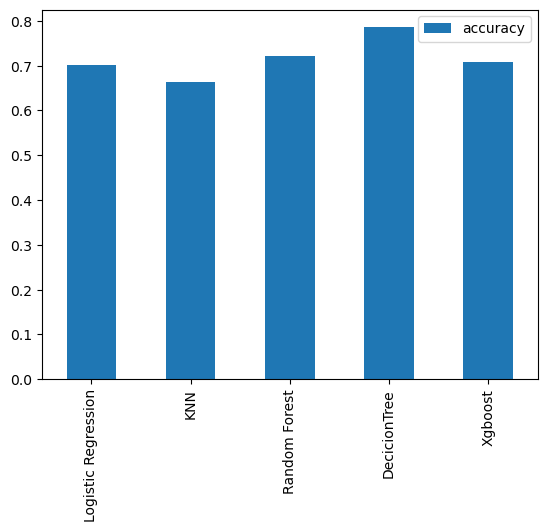

In [708]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

#### Menggunakan Ensemble Learning

**Ensemble** learning adalah teknik dalam machine learning yang menggabungkan beberapa model untuk meningkatkan kinerja prediksi dibandingkan dengan menggunakan satu model tunggal. Pendekatan ini berfokus pada prinsip bahwa kombinasi beberapa model dapat menghasilkan hasil yang lebih baik dan lebih stabil.

In [711]:
# Membuat model dasar
model1 = DecisionTreeClassifier(random_state=42)
model2 = XGBClassifier(random_state=42)
model3 = RandomForestClassifier(random_state=42) 
model4 = KNeighborsClassifier()
model5 = LogisticRegression(solver='saga', max_iter=200)

In [712]:
# Menggabungkan model dengan Voting
ensemble_model = VotingClassifier(estimators=[
    ('dt', model1), 
    ('xgb', model2),
    ('rf', model3),
    ('knn', model4),
    ('lr', model5)],
    voting='soft'  
)

# Melatih model ensemble
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_typ...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lr',
                              LogisticRegression(max_iter=200, solver='saga'))],
                 voting='soft')

In [713]:
from sklearn.metrics import accuracy_score

# Membuat prediksi
y_pred = ensemble_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model ensemble: {accuracy:.2f}')

Akurasi model ensemble: 0.73


## 6. Evaluasi Model

Kita akan mengevaluasi model menggunakan ROC Curve

**Apa itu ROC Curve?**
    
ROC Curve menggambarkan hubungan antara `True Positive Rate (TPR)` dan `False Positive Rate (FPR)` pada berbagai ambang batas (thresholds) klasifikasi.

- True Positive Rate (TPR): Proporsi dari semua kasus positif yang berhasil diidentifikasi oleh model (juga dikenal sebagai sensitivitas).

- False Positive Rate (FPR): Proporsi dari semua kasus negatif yang salah diklasifikasikan sebagai positif.

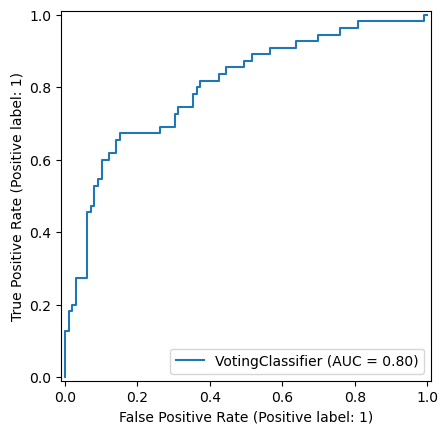

In [716]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=ensemble_model, 
                               X=X_test, 
                               y=y_test); 

model ini memiliki performa klasifikasi yang cukup baik, dengan kemampuan yang cukup untuk membedakan antara kelas positif dan negatif. Nilai AUC yang mendekati 1 menunjukkan performa yang lebih baik.

In [718]:
from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



1. Precision
Precision untuk kelas 0 (0.81) lebih tinggi dibandingkan kelas 1 (0.62). Ini menunjukkan bahwa model lebih baik dalam mengidentifikasi dengan benar kelas 0 dibandingkan dengan kelas 1. Dengan kata lain, dari semua prediksi kelas 0, 81% benar. Namun, hanya 62% prediksi kelas 1 yang benar.

2. Recall
Recall untuk kelas 0 adalah 0.77, dan untuk kelas 1 adalah 0.67. Ini berarti dari semua instance sebenarnya di kelas 0, model berhasil mengidentifikasi 77% dengan benar, sedangkan untuk kelas 1, hanya 67% yang diidentifikasi dengan benar.

3. F1-Score
F1-Score merupakan rata-rata harmonis dari precision dan recall. Nilainya untuk kelas 0 adalah 0.79 dan untuk kelas 1 adalah 0.64. Kelas 0 memiliki performa yang lebih baik dibandingkan dengan kelas 1, yang menunjukkan bahwa model lebih efektif untuk kelas 0.

#### Penjelasan

- Presisi: Mengukur seberapa banyak prediksi positif yang benar dari semua prediksi positif yang dibuat.

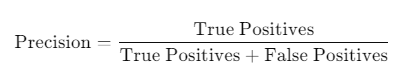

- Recall: Mengukur seberapa banyak prediksi positif yang benar dari semua kasus positif yang sebenarnya.

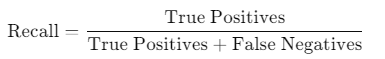

- F1-Score: Merupakan rata-rata harmonis dari presisi dan recall, memberikan ukuran kinerja yang seimbang.

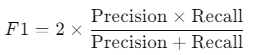

## Kesimpulan Prioritas Evaluasi
Untuk memprediksi diabetes, recall (sensitivitas) dan AUC (Area Under the ROC Curve) adalah metrik utama yang perlu diperhatikan:

- Recall untuk kelas positif (diabetes) sangat penting karena fokusnya adalah memastikan pasien yang benar-benar menderita diabetes tidak terlewatkan. Ini membantu mengurangi false negatives yang bisa berbahaya.

- AUC menggambarkan kemampuan model membedakan antara pasien dengan diabetes dan tanpa diabetes secara keseluruhan. AUC yang lebih tinggi menunjukkan performa yang lebih baik.

Dengan fokus utama pada recall dan AUC, model dapat membantu memastikan lebih sedikit pasien diabetes yang terlewat dalam diagnosis

# Terimakasih ^^